In [ ]:
!pip install yahoofinancials yfinance
from datetime import datetime
import yfinance as yf
from pandas_datareader.data import DataReader

import numpy as np
import pandas as pd
from yahoofinancials import YahooFinancials
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']


In [ ]:
def retrieve_stock_data(ticker, start, end):
    json = YahooFinancials(ticker).get_historical_price_data(start, end, "daily")
    df = pd.DataFrame(columns=["open","close","adjclose"])
    for row in json[ticker]["prices"]:
        date = datetime.fromisoformat(row["formatted_date"])
        df.loc[date] = [row["open"], row["close"], row["adjclose"]]
    df.index.name = "date"
    return df

<Figure size 720x216 with 0 Axes>

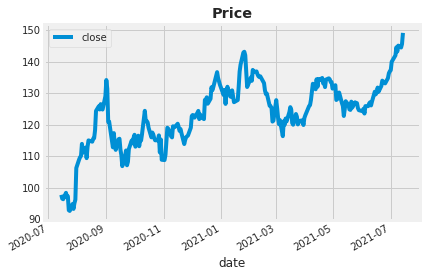

In [ ]:
AAPL = retrieve_stock_data("AAPL", "2020-07-15", "2021-07-15")
fig = plt.figure()
fig.set_size_inches(10,3)
AAPL.plot(y="close")
plt.title("Price", weight="bold");

<Figure size 720x216 with 0 Axes>

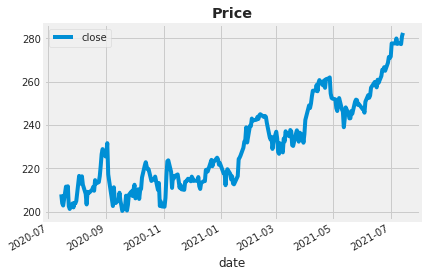

In [ ]:
MSFT = retrieve_stock_data("MSFT", "2020-07-15", "2021-07-15")
fig = plt.figure()
fig.set_size_inches(10,3)
MSFT.plot(y="close")
plt.title("Price", weight="bold");

<Figure size 720x216 with 0 Axes>

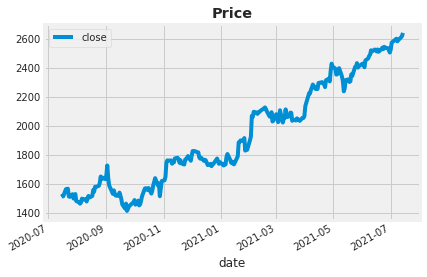

In [ ]:
GOOG = retrieve_stock_data("GOOG", "2020-07-15", "2021-07-15")
fig = plt.figure()
fig.set_size_inches(10,3)
GOOG.plot(y="close")
plt.title("Price", weight="bold");

<Figure size 720x216 with 0 Axes>

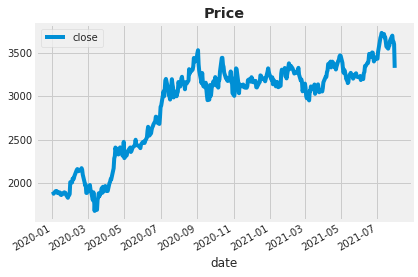

In [ ]:
AMZN = retrieve_stock_data("AMZN", "2020-01-01", "2021-07-31")
fig = plt.figure()
fig.set_size_inches(10,3)
AMZN.plot(y="close")
plt.title("Price", weight="bold");

In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

# Statistici sumare
AAPL.describe()

# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-07-15 to 2021-07-14
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          252 non-null    float64
 1   close         252 non-null    float64
 2   adjclose      252 non-null    float64
 3   company_name  252 non-null    object 
dtypes: float64(3), object(1)
memory usage: 9.8+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

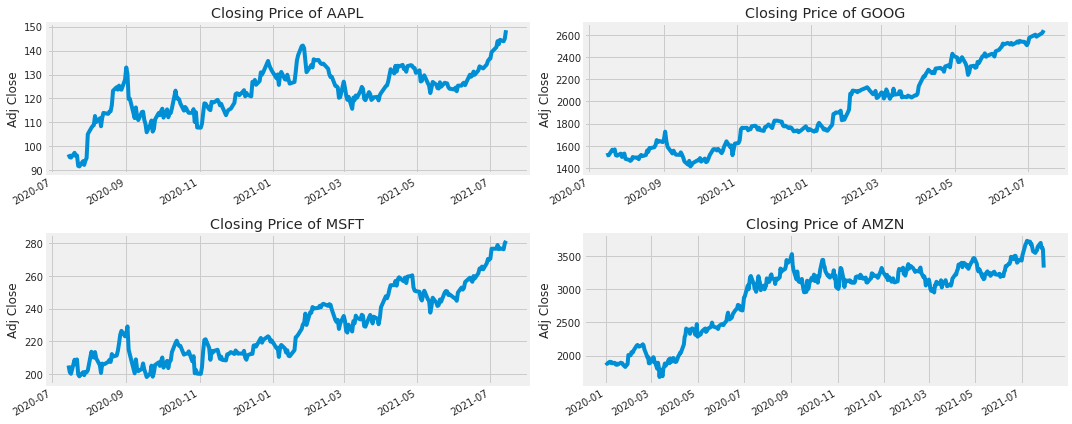

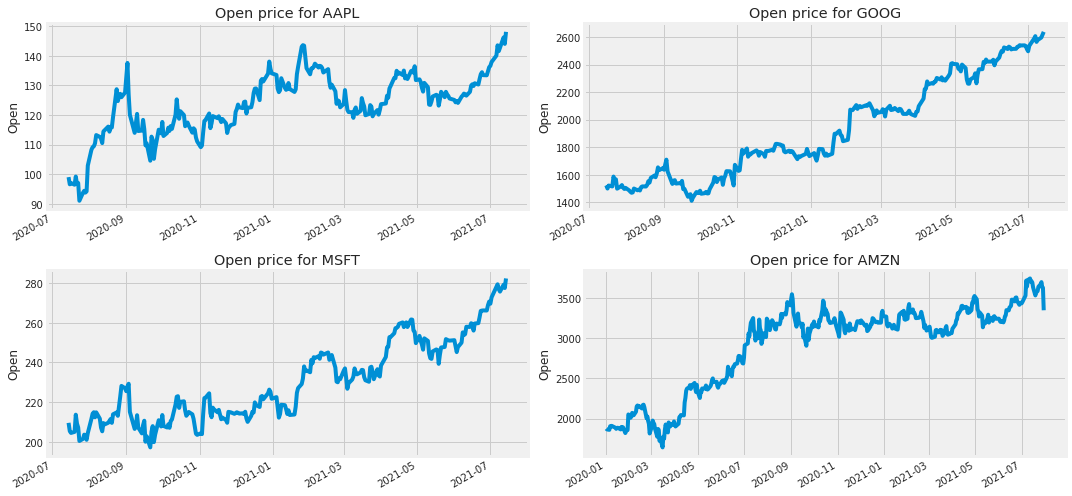

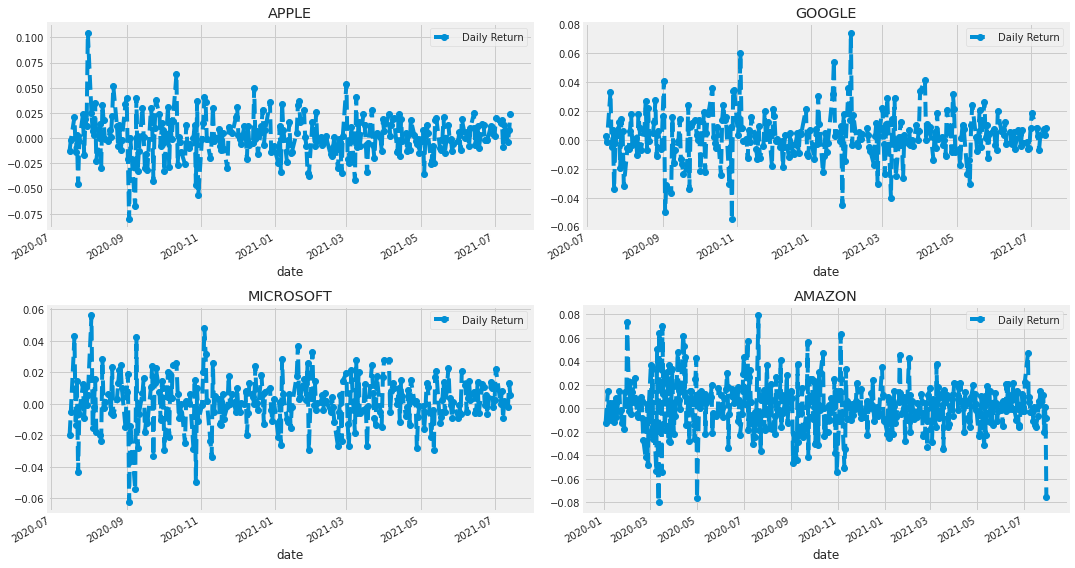

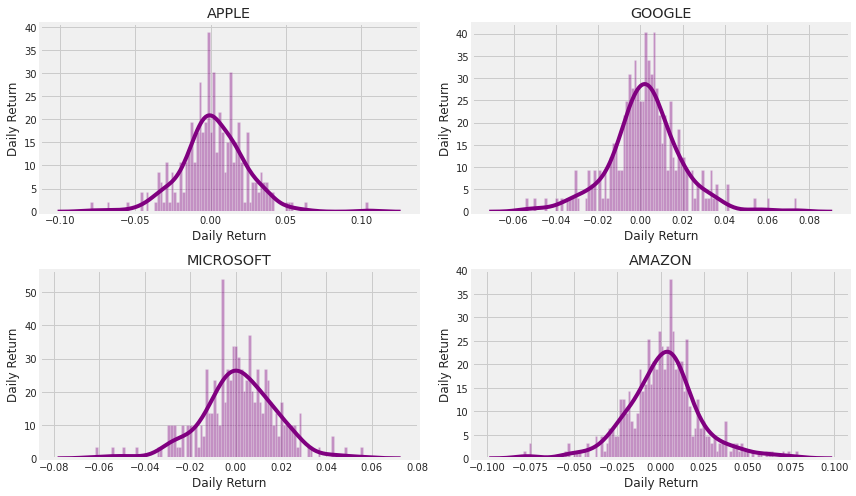

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['adjclose'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

# Acum să reprezentăm volumul total de acțiuni tranzacționate în fiecare zi -  Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['open'].plot()
    plt.ylabel('Open')
    plt.xlabel(None)
    plt.title(f"Open price for {tech_list[i - 1]}")
    
plt.tight_layout()
#Acum că am văzut vizualizările pentru prețul de închidere și volumul tranzacționat în fiecare zi, să mergem mai departe și să caculăm media mobilă pentru acțiuni.

#2. Care a fost randamentul zilnic al stocului în medie?

#Acum că am făcut câteva analize de bază, să mergem mai departe și să ne scufundăm puțin mai adânc. Acum vom analiza riscul stocului. Pentru a face acest lucru, va trebui să analizăm mai atent modificările zilnice ale stocului și nu doar valoarea absolută a acestuia. Să mergem mai departe și să folosim panda pentru a obține randamentele zilnice pentru stocul Apple.


## Vom folosi pct_change pentru a găsi modificarea procentuală pentru fiecare zi - We'll use pct_change to find the percent change for each day
for company in company_list:
  company['Daily Return'] = company['adjclose'].pct_change()

# Then we'll plot the daily return percentage - #Am stabilit procentajul de returnare zilnic
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


#Acum am aruncat o privire generală asupra randamentului mediu zilnic folosind o histogramă. Vom folosi seaborn pentru a crea atât o histogramă cât și un grafic kde pe aceeași figură.


# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn- Reținem utilizarea dropna () aici, altfel valorile NaN nu pot fi citite de seaborn
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done: # Ar fi putut face și:
#AAPL['Daily Return'].hist()
plt.tight_layout()


#3.Care a fost corelația dintre diferite prețuri de închidere a acțiunilor?


In [ ]:
#Acum, dacă am dori să analizăm randamentele tuturor stocurilor din lista noastră, mergem mai departe și construim un DataFrame cu toate coloanele ['Close'] pentru fiecare dintre cadrele de date stocuri.


#Acum că avem toate prețurile de închidere, să mergem mai departe și să obținem randamentul zilnic pentru toate acțiunile AAPL, așa cum am făcut pentru acțiunile Apple.

closing_df = retrieve_stock_data('AAPL', start='2012-01-01', end='2021-07-15')['adjclose']

# Let's take a quick look - # Să aruncăm o privire rapidă
closing_df.head() 

# Make a new tech returns DataFrame - # Faceți o nouă tehnologie care returnează DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()
#sns.jointplot('AAPL', 'AAPL', tech_rets, kind='scatter', color='seagreen')
#ValueError: Could not interpret value `AAPL` for parameter `x`


date
2012-01-03         NaN
2012-01-04    0.005374
2012-01-05    0.011102
2012-01-06    0.010454
2012-01-09   -0.001586
Name: adjclose, dtype: float64

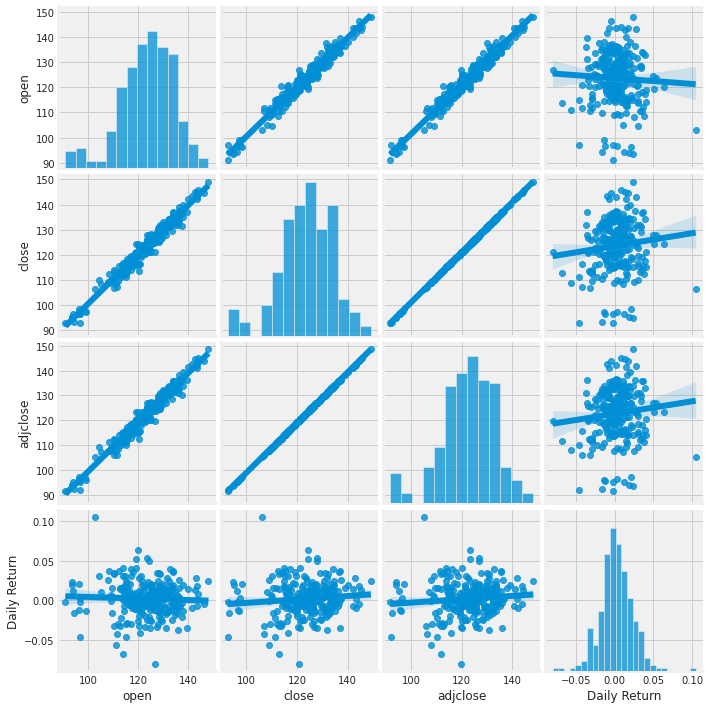

In [ ]:
sns.pairplot(AAPL, kind='reg')


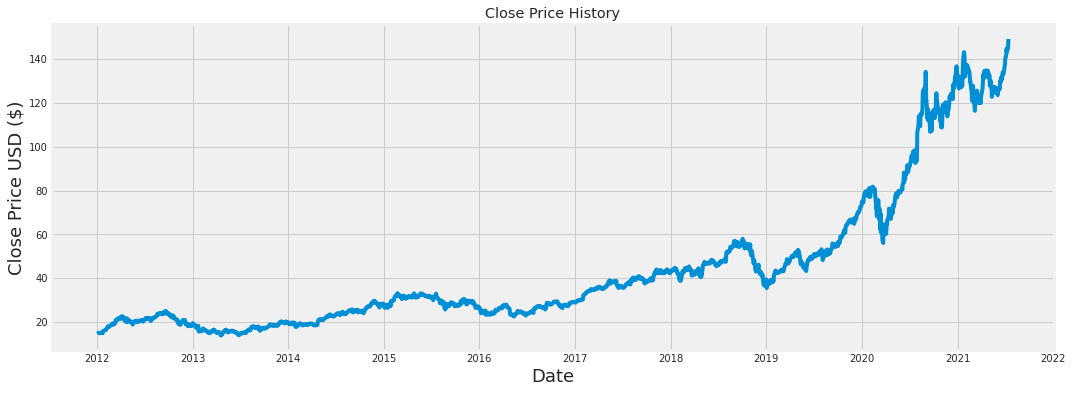

[array([0.00546799, 0.00605176, 0.00726423, 0.00841859, 0.0082416 ,
       0.00864048, 0.00845821, 0.00815179, 0.00773442, 0.00902614,
       0.01019106, 0.00983181, 0.00786386, 0.009742  , 0.00789292,
       0.01482696, 0.01429074, 0.01499074, 0.01650434, 0.01742095,
       0.01734435, 0.01706171, 0.01826625, 0.01939947, 0.02068326,
       0.02275687, 0.02711277, 0.02717881, 0.02960375, 0.03141584,
       0.02830147, 0.02950072, 0.02947695, 0.03283963, 0.03236151,
       0.03324642, 0.03483663, 0.03572155, 0.03827064, 0.04012763,
       0.04066387, 0.04085142, 0.0376763 , 0.03691024, 0.03702383,
       0.04000878, 0.04084879, 0.04265296, 0.04690583, 0.05257986,
       0.05151796, 0.0515206 , 0.05562292, 0.05690671, 0.05599273,
       0.05515801, 0.05428894, 0.05717614, 0.0591573 , 0.05998674])]
[0.05793690333412359]

[array([0.00546799, 0.00605176, 0.00726423, 0.00841859, 0.0082416 ,
       0.00864048, 0.00845821, 0.00815179, 0.00773442, 0.00902614,
       0.01019106, 0.00983181, 0.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


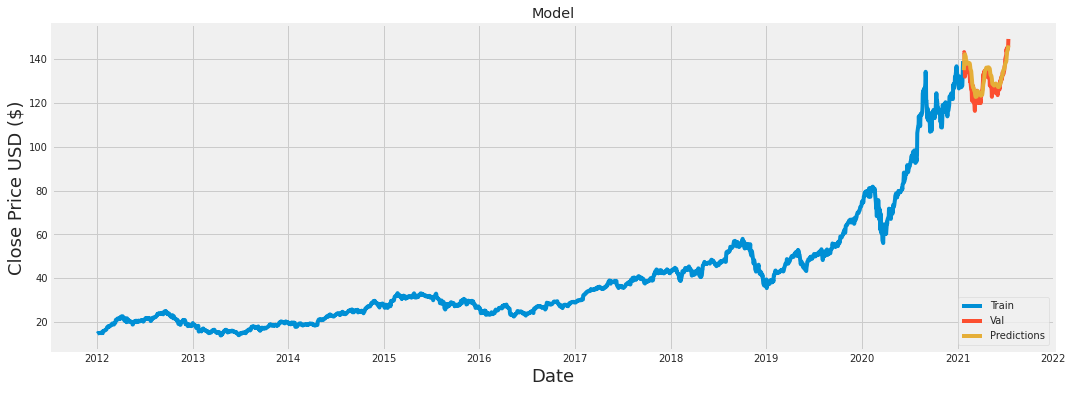

                 close  Predictions
date                               
2021-01-25  142.919998   134.922958
2021-01-26  143.160004   137.516037
2021-01-27  142.059998   139.972900
2021-01-28  137.089996   141.786438
2021-01-29  131.960007   142.195786
...                ...          ...
2021-07-08  143.240005   141.923920
2021-07-09  145.110001   143.241638
2021-07-12  144.500000   144.505829
2021-07-13  145.639999   145.421936
2021-07-14  149.149994   146.224030

[119 rows x 2 columns]
[2.33443147] % EROARE
2219/2219 [==============================] - 136s 59ms/step - loss: 0.0016


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


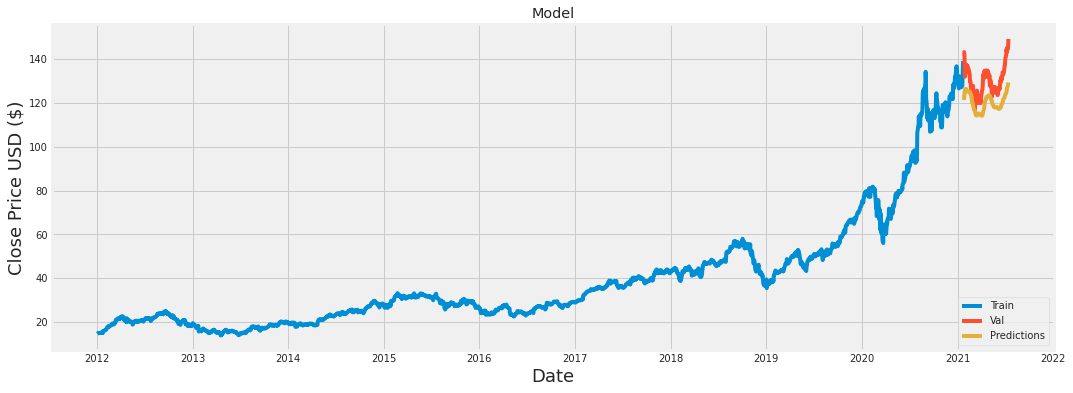

array([0.07273384])

In [ ]:
#4.Prezicerea prețului de închidere al acțiunii APPLE inc. Cum putem încerca să prezicem comportamentul viitor al stocului? (Prezicerea prețului de închidere al acțiunii APPLE inc folosind LSTM)

# Get the stock quote # Obțineți cotația bursieră
df = retrieve_stock_data('AAPL', start='2012-01-01', end='2021-07-15')
# Show teh data - # Afișați datele
df

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


# Create a new dataframe with only the 'Close column - # Creați un cadru de date nou numai cu 'Închideți coloana'
data = df.filter(['close'])
# Convert the dataframe to a numpy array - # Convertiți cadrul de date într-o matrice numpy
dataset = data.values
# Get the number of rows to train the model on - # Obțineți numărul de rânduri pe care să antrenați modelul
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

# Scale the data - # Scalați datele
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

# Create the training data set - # Creați setul de date de antrenament
# Create the scaled training data set - # Creați setul de date de formare la scară


train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets - # Împărțiți datele în seturi de date x_train și y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays - # Convertiți x_train și y_train în matrici numpy


x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data - # Remodelați datele
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the 1st order LSTM model - # Construiți modelul LSTM de ordinul 1
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compilarea modelului
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model - Antrenarea modelului
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set - # Creați setul de date de testare
# Create a new array containing scaled values from index 1543 to 2002 - # Creați o nouă matrice care conține valori scalate de la indexul 1543 până la 2002

test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test - # Creați seturile de date x_test și y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array - # Convertiți datele într-o matrice numpy
x_test = np.array(x_test)

# Reshape the data - # Remodelați datele
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values - # Obțineți valorile prețurilor prevăzute pentru modele
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)



# Plot the data - Trasarea datelor 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data - Vizualizarea datelor 
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices - Afișați prețurile valabile și estimate


print(valid)
from sklearn.metrics import mean_absolute_error as mae

MAPE =0 
for i in range(len(predictions)):
    MAPE+=abs(predictions[i]-y_test[i])/y_test[i]
MAPE/=len(predictions)    
print(MAPE*100,'% EROARE')

net = Sequential()
net.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
net.add(LSTM(64, return_sequences=True))
net.add(LSTM(64))
net.add(Dense(25))
net.add(Dense(1))
# Compilarea modelului
net.compile(optimizer='adam', loss='mean_squared_error')

#Antrenarea modelului
net.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set - Crearea setului de date de testare


# Create a new array containing scaled values from index 1543 to 2002  - # Creați o nouă matrice care conține valori scalate de la indexul 1543 până la 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test - # Creați seturile de date x_test și y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array - # Convertiți datele într-o matrice numpy
x_test = np.array(x_test)

# Reshape the data - # Remodelați datele
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values - # Obțineți valorile prețurilor prevăzute pentru modele
predictions = net.predict(x_test)
predictions = scaler.inverse_transform(predictions)


# Plot the data - Trasarea datelor
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Vizualizarea datelor
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices - # Afișarea prețurilor valabile și estimate

MAPE =0 
for i in range(len(predictions)):
    MAPE+=abs(predictions[i]-y_test[i])/y_test[i]
MAPE/=len(predictions)   
MAPE
